<a href="https://colab.research.google.com/github/Youruler1/Speech-Processing-Lab-Material/blob/main/3_HMM_Speech_Modelling_and_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reading a .wav file using scipy.io

In [ ]:
ls

anscombe.json*               california_housing_train.csv  mnist_train_small.csv
california_housing_test.csv  mnist_test.csv                README.md*


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd ..

/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile  #used to R/W wav audio file
sampling_freq, audio = wavfile.read('/content/drive/MyDrive/BAK.wav') #read wav file and sampling freq stores freq of audio file
#audio stores audio data of numpy array
#print shape of audio numpy array
print( '\nShape:', audio.shape)
print ('Datatype:', audio.dtype)
#Calculates the duration of the audio file in seconds
print ('Duration:', round(audio.shape[0] / float(sampling_freq), 3), 'seconds')


Shape: (367538, 2)
Datatype: int16
Duration: 8.334 seconds


<ipython-input-2-3bd191de7354>:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_freq, audio = wavfile.read('/content/drive/MyDrive/BAK.wav') #read wav file and sampling freq stores freq of audio file


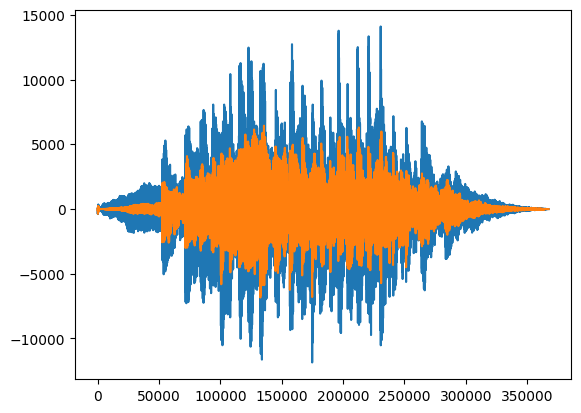

In [ ]:
plt.plot(audio)

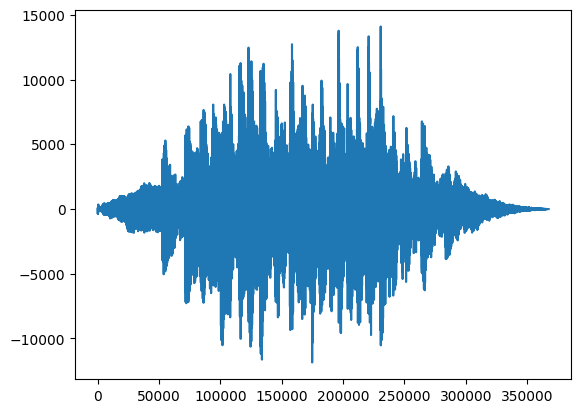

In [ ]:
#Plot only left Channel
plt.plot(audio[:, 0], label='Left Channel')

Normalization of underlying audio. There are many techniques such as peak normalization, RMS normailization, and so on

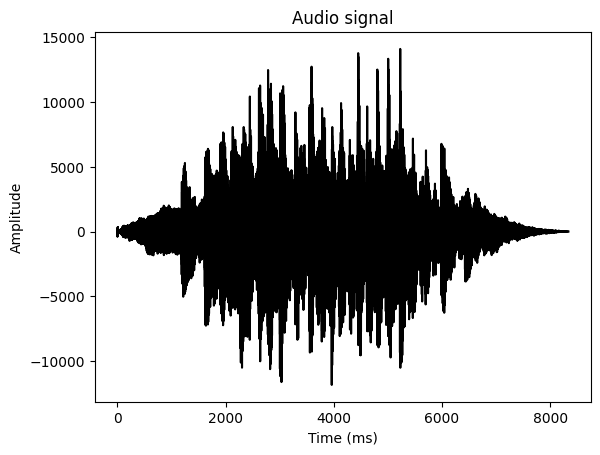

In [ ]:
#audio=audio/2.**15 (assuming audio data stored at 16bit which range from )
#audio=audio/np.max(np.abs(audio))
#audio=audio[:30]
#rms = np.sqrt(np.mean(audio**2))
#target_rms = 0.1
#scaling_factor = target_rms / rms
#audio = audio * scaling_factor
x_values = np.arange(0, len(audio), 1) / float(sampling_freq)
x_values = x_values * 1000
plt.plot(x_values, audio, color='black')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.title('Audio signal')
plt.show()

Plotting the above sound wave in frequency domain

In [ ]:
transformed_signal = np.fft.fft(audio)

In [ ]:
half_length = np.ceil((len(audio) + 1) / 2.0)
half_length=int(half_length)
transformed_signal = abs(transformed_signal[0:half_length])
transformed_signal **= 2

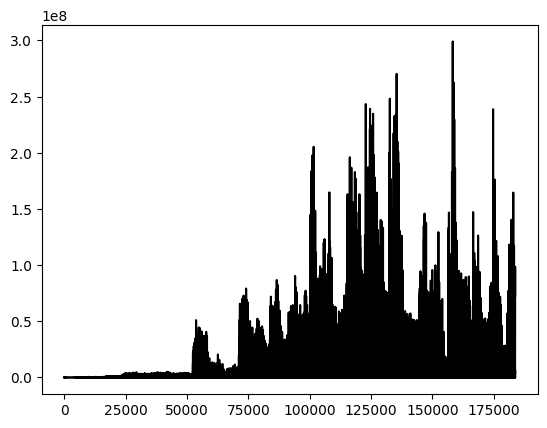

In [ ]:
plt.plot(transformed_signal, color='black')


In [ ]:
audio

array([[ 9, 27],
       [ 5, 13],
       [-6, -2],
       ...,
       [ 0,  0],
       [ 0,  0],
       [ 0,  0]], dtype=int16)

Extracting the features out of the audio file

In [ ]:
import numpy as np
from librosa.feature import mfcc #used audio feature for audio and speech processing
import librosa
audio,sampling_rate = librosa.load("/content/drive/MyDrive/BAK.wav")
mfcc_features = mfcc(y=audio,sr=sampling_rate)
print("Number of windows =", mfcc_features.shape[0])
print('Length of each feature =', mfcc_features.shape[1])

Number of windows = 20
Length of each feature = 359


Loading a data set for implementing classification using HMM modelling

In [ ]:
import os
for dirname in os.listdir('/content/drive/MyDrive/hmm-speech-recognition-0.1/audio'):
  subfolder = os.path.join('/content/drive/MyDrive/hmm-speech-recognition-0.1/audio', dirname)
  label = subfolder[subfolder.rfind('/') + 1:]
  print(label)

pineapple
peach
orange
lime
kiwi
banana
apple


In [ ]:
pip install hmmlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.9/165.9 kB 3.2 MB/s eta 0:00:00


In [ ]:
pip install features

In [ ]:
pip install librosa

In [ ]:
from scipy.io import wavfile
from hmmlearn import hmm

Initialising the GMM/HMM model

In [ ]:
class HMMTrainer(object):   #training and working with hidden markov model
   def __init__(self, model_name='GaussianHMM', n_components=7): #no of hidden states in HMM
     self.model_name = model_name
     self.n_components = n_components

     self.models = []
     if self.model_name == 'GaussianHMM':
        self.model=hmm.GaussianHMM(n_components=4)
     else:
        print("Please choose GaussianHMM")
   def train(self, X):
       self.models.append(self.model.fit(X))
   def get_score(self, input_data):
       return self.model.score(input_data)

Training the input audio files using HMM/GMM model

In [ ]:
import os
import librosa
import numpy as np
from librosa.feature import mfcc
hmm_models = []  #will store train HMM model

for dirname in os.listdir('/content/drive/MyDrive/hmm-speech-recognition-0.1/audio'):
  # Get the name of the subfolder
  subfolder = os.path.join('/content/drive/MyDrive/hmm-speech-recognition-0.1/audio/', dirname)
  print(subfolder)
  if not os.path.isdir(subfolder):
    continue
  # Extract the label
  label = subfolder[subfolder.rfind('/') + 1:]
  # Initialize variables
  X = np.array([])  #store all Mfcc feature for all .wav files
  y_words = [] #list to store labels
  #list all .wav file in subfolder excluding last file
  for filename in [x for x in os.listdir(subfolder) if x.endswith('.wav')][:-1]:
   # Read the input file
   filepath = os.path.join(subfolder, filename)  #load audio file in numpy array
   audio, sampling_freq = librosa.load(filepath)
   # Extract MFCC features
   mfcc_features = mfcc(y=audio,sr=sampling_freq)
   # Append to the variable X
   if len(X) == 0:
     X = mfcc_features[:,:15]
   else:
     X = np.append(X, mfcc_features[:,:15], axis=0)
   # Append the label
   y_words.append(label)
   print('X.shape =', X.shape)
   hmm_trainer = HMMTrainer()
  hmm_trainer.train(X)
  hmm_models.append((hmm_trainer, y_words))
  hmm_trainer = None

/content/drive/MyDrive/hmm-speech-recognition-0.1/audio/pineapple
X.shape = (20, 15)
X.shape = (40, 15)
X.shape = (60, 15)
X.shape = (80, 15)
X.shape = (100, 15)
X.shape = (120, 15)
X.shape = (140, 15)
X.shape = (160, 15)
X.shape = (180, 15)
X.shape = (200, 15)
X.shape = (220, 15)
X.shape = (240, 15)
X.shape = (260, 15)
X.shape = (280, 15)
/content/drive/MyDrive/hmm-speech-recognition-0.1/audio/peach
X.shape = (20, 15)
X.shape = (40, 15)
X.shape = (60, 15)
X.shape = (80, 15)
X.shape = (100, 15)
X.shape = (120, 15)
X.shape = (140, 15)
X.shape = (160, 15)
X.shape = (180, 15)
X.shape = (200, 15)
X.shape = (220, 15)
X.shape = (240, 15)
X.shape = (260, 15)
X.shape = (280, 15)
/content/drive/MyDrive/hmm-speech-recognition-0.1/audio/orange
X.shape = (20, 15)
X.shape = (40, 15)
X.shape = (60, 15)
X.shape = (80, 15)
X.shape = (100, 15)
X.shape = (120, 15)
X.shape = (140, 15)
X.shape = (160, 15)
X.shape = (180, 15)
X.shape = (200, 15)
X.shape = (220, 15)
X.shape = (240, 15)
X.shape = (260, 15)
X

In [ ]:
y_words

['apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple',
 'apple']

In [ ]:
X

array([[-296.6612   , -222.12556  , -197.04259  , ..., -310.94495  ,
        -335.96643  , -341.54175  ],
       [ 201.4354   ,  237.18423  ,  244.8755   , ...,  241.65141  ,
         222.7066   ,  198.46774  ],
       [-109.10652  , -143.23889  , -157.1709   , ...,  -34.518616 ,
         -32.780613 ,  -35.069855 ],
       ...,
       [ -11.381189 ,  -14.763737 ,  -19.498135 , ...,   -9.299604 ,
         -12.649971 ,   -6.7667913],
       [  -0.72263  ,   -4.2806787,   -2.177899 , ...,   -3.8874362,
          -7.2838287,   -4.635844 ],
       [  -6.940254 ,   -7.3959594,   -7.835597 , ...,   -9.219351 ,
         -10.928658 ,  -13.518029 ]], dtype=float32)

In [ ]:
hmm_models

[(<__main__.HMMTrainer at 0x7ba0c75b8f50>,
  ['pineapple',
   'pineapple',
   'pineapple',
   'pineapple',
   'pineapple',
   'pineapple',
   'pineapple',
   'pineapple',
   'pineapple',
   'pineapple',
   'pineapple',
   'pineapple',
   'pineapple',
   'pineapple']),
 (<__main__.HMMTrainer at 0x7ba0bb841850>,
  ['peach',
   'peach',
   'peach',
   'peach',
   'peach',
   'peach',
   'peach',
   'peach',
   'peach',
   'peach',
   'peach',
   'peach',
   'peach',
   'peach']),
 (<__main__.HMMTrainer at 0x7ba0bb851950>,
  ['orange',
   'orange',
   'orange',
   'orange',
   'orange',
   'orange',
   'orange',
   'orange',
   'orange',
   'orange',
   'orange',
   'orange',
   'orange',
   'orange']),
 (<__main__.HMMTrainer at 0x7ba0c7d01950>,
  ['lime',
   'lime',
   'lime',
   'lime',
   'lime',
   'lime',
   'lime',
   'lime',
   'lime',
   'lime',
   'lime',
   'lime',
   'lime',
   'lime']),
 (<__main__.HMMTrainer at 0x7ba0c7ba1450>,
  ['kiwi',
   'kiwi',
   'kiwi',
   'kiwi',
   'k

Test data

In [ ]:
input_files = [
'/content/drive/MyDrive/hmm-speech-recognition-0.1/audio/pineapple/pineapple15.wav',
'/content/drive/MyDrive/hmm-speech-recognition-0.1/audio/orange/orange15.wav',
'/content/drive/MyDrive/hmm-speech-recognition-0.1/audio/apple/apple15.wav',
'/content/drive/MyDrive/hmm-speech-recognition-0.1/audio/kiwi/kiwi15.wav'
]

Testing the GMM/HMM model for the above test data

In [ ]:
scores=[] #empty list to store the score
i=0
for item in hmm_models:
    hmm_model, label = item
    # Extract MFCC features with 15 coefficients, consistent with training data
    audio, sampling_freq = librosa.load(input_files[0]) #load input audio file
    mfcc_features = mfcc(y=audio, sr=sampling_freq)[:, :15]
    score = hmm_model.get_score(mfcc_features) #compute score
    scores.append(score) #append the score
    index=np.array(scores).argmax()  #find index of maximum score
    # Print the output
print("\nTrue:", input_files[0])
print("Predicted:", hmm_models[index][1])


True: /content/drive/MyDrive/hmm-speech-recognition-0.1/audio/pineapple/pineapple15.wav
Predicted: ['pineapple', 'pineapple', 'pineapple', 'pineapple', 'pineapple', 'pineapple', 'pineapple', 'pineapple', 'pineapple', 'pineapple', 'pineapple', 'pineapple', 'pineapple', 'pineapple']


In [ ]:
hmm_models[0][1]

['pineapple',
 'pineapple',
 'pineapple',
 'pineapple',
 'pineapple',
 'pineapple',
 'pineapple',
 'pineapple',
 'pineapple',
 'pineapple',
 'pineapple',
 'pineapple',
 'pineapple',
 'pineapple']